In [26]:
import pandas as pd 
import numpy as np 

In [27]:
stock_return= pd.read_csv("processed_stock.csv")
stock_return.index= stock_return['Date']

stock_return= stock_return.drop(columns=['Date'])

stock_return

,HDL,SHIVM,STC,UNL
Date,,,,
2019-06-12,1717.0,665.0,484.0,19696.0
2019-07-07,1685.0,616.0,484.0,20250.0
2019-07-31,1578.0,602.0,493.0,20195.0
2019-08-26,1560.0,573.0,603.0,19600.0
2019-09-23,1473.0,553.0,658.0,18621.0
...,...,...,...,...
2022-06-30,3405.0,774.0,3585.0,18700.0
2022-07-03,3625.0,830.0,3989.7,18335.0
2022-07-04,3600.0,826.0,4263.0,18400.0


In [28]:
(stock_return == 0 ).sum()

HDL      1
SHIVM    1
STC      1
UNL      1
dtype: int64

In [29]:
## convert 0 to nan values and then remove nan values
stock_return= stock_return.replace(0, np.nan)
cleaned_data= stock_return.dropna()
(cleaned_data.isnull()).sum()

HDL      0
SHIVM    0
STC      0
UNL      0
dtype: int64

## calculuating portfolio return   **change in value over time**
### formula 👇
$\text{Returns} = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100$


In [30]:
returns = cleaned_data.pct_change().dropna()
returns[:3]

,HDL,SHIVM,STC,UNL
Date,,,,
2019-07-07,-0.018637,-0.073684,0.000000,0.028128
2019-07-31,-0.063501,-0.022727,0.018595,-0.002716
2019-08-26,-0.011407,-0.048173,0.223124,-0.029463


In [31]:
## calculating individual mean returns
meanDailyReturns= returns.mean()
meanDailyReturns

HDL      0.002596
SHIVM    0.001057
STC      0.005918
UNL      0.000045
dtype: float64

In [32]:
weights= np.array([1/10] * 4) 
weights

array([0.1, 0.1, 0.1, 0.1])

In [33]:
##  expected portfolio performance 
portReport= np.sum(weights*meanDailyReturns)
portReport

0.0009616253909632219

In [35]:
daily_cum_return= (1 + returns).cumprod()

In [41]:
import matplotlib.pyplot as plt 

<Figure size 2000x800 with 0 Axes>

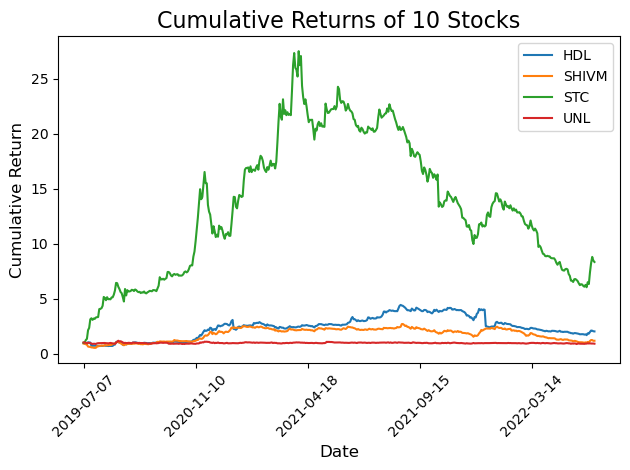

In [42]:

# Increase the figure size
plt.figure(figsize=(20, 8))

# Plot the cumulative returns
daily_cum_return.plot()

# Set labels and title for clarity
plt.title('Cumulative Returns of 10 Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


## finding the optimal weights

In [ ]:

from scipy.optimize import minimize

# Objective: Minimize portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Constraint: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: No short selling (weights between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(meanDailyReturns)))

# Initial guess: equal weights
initial_weights = np.array([1/len(meanDailyReturns)] * len(meanDailyReturns))

# Covariance matrix
cov_matrix = returns.cov()

# Optimize
result = minimize(portfolio_variance, initial_weights,
                  args=(cov_matrix,),
                  method='SLSQP',
                  bounds=bounds,
                  constraints=constraints)

# Optimal weights
optimal_weights = result.x


print("Optimal Portfolio Weights:")
print(optimal_weights)


Optimal Portfolio Weights:
[0.08724554 0.31528835 0.         0.59746612]


In [46]:
portReport= np.sum(weights*meanDailyReturns)
portReport

0.0009616253909632219

In [47]:
portReport * 292

0.2807946141612608